### Import Repo and Install packages:

In [ ]:
!git clone https://github.com/jhell1717/latentoptim.git
!pip install git+https://github.com/jhell1717/latentoptim.git

### Imports
* Import standard packages

In [24]:
import os
import pickle
import numpy as np
import torch

import vae
import data
import utils

if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

### Generate Random Shape Dataset:
* User specifies resolution
* User specifies number of shapes to generate.

In [ ]:
base_dir = r'/content/latentoptim/examples/vae_examples/colab'
# Creates shape random shape data.
shape_data = data.Generator(resolution=200,num_shapes=50).generate_shapes()

file_path = os.path.join(base_dir,'demo_shapes.pkl'),

# Save shape population as .pkl
with open(file_path[0], "wb") as f:
    pickle.dump(shape_data, f)

dataset = vae.ShapeData(shape_data) # Create dataset object

100%|██████████| 50/50 [00:00<00:00, 4847.67it/s]


### Visualise a random generated shape from the dataset:

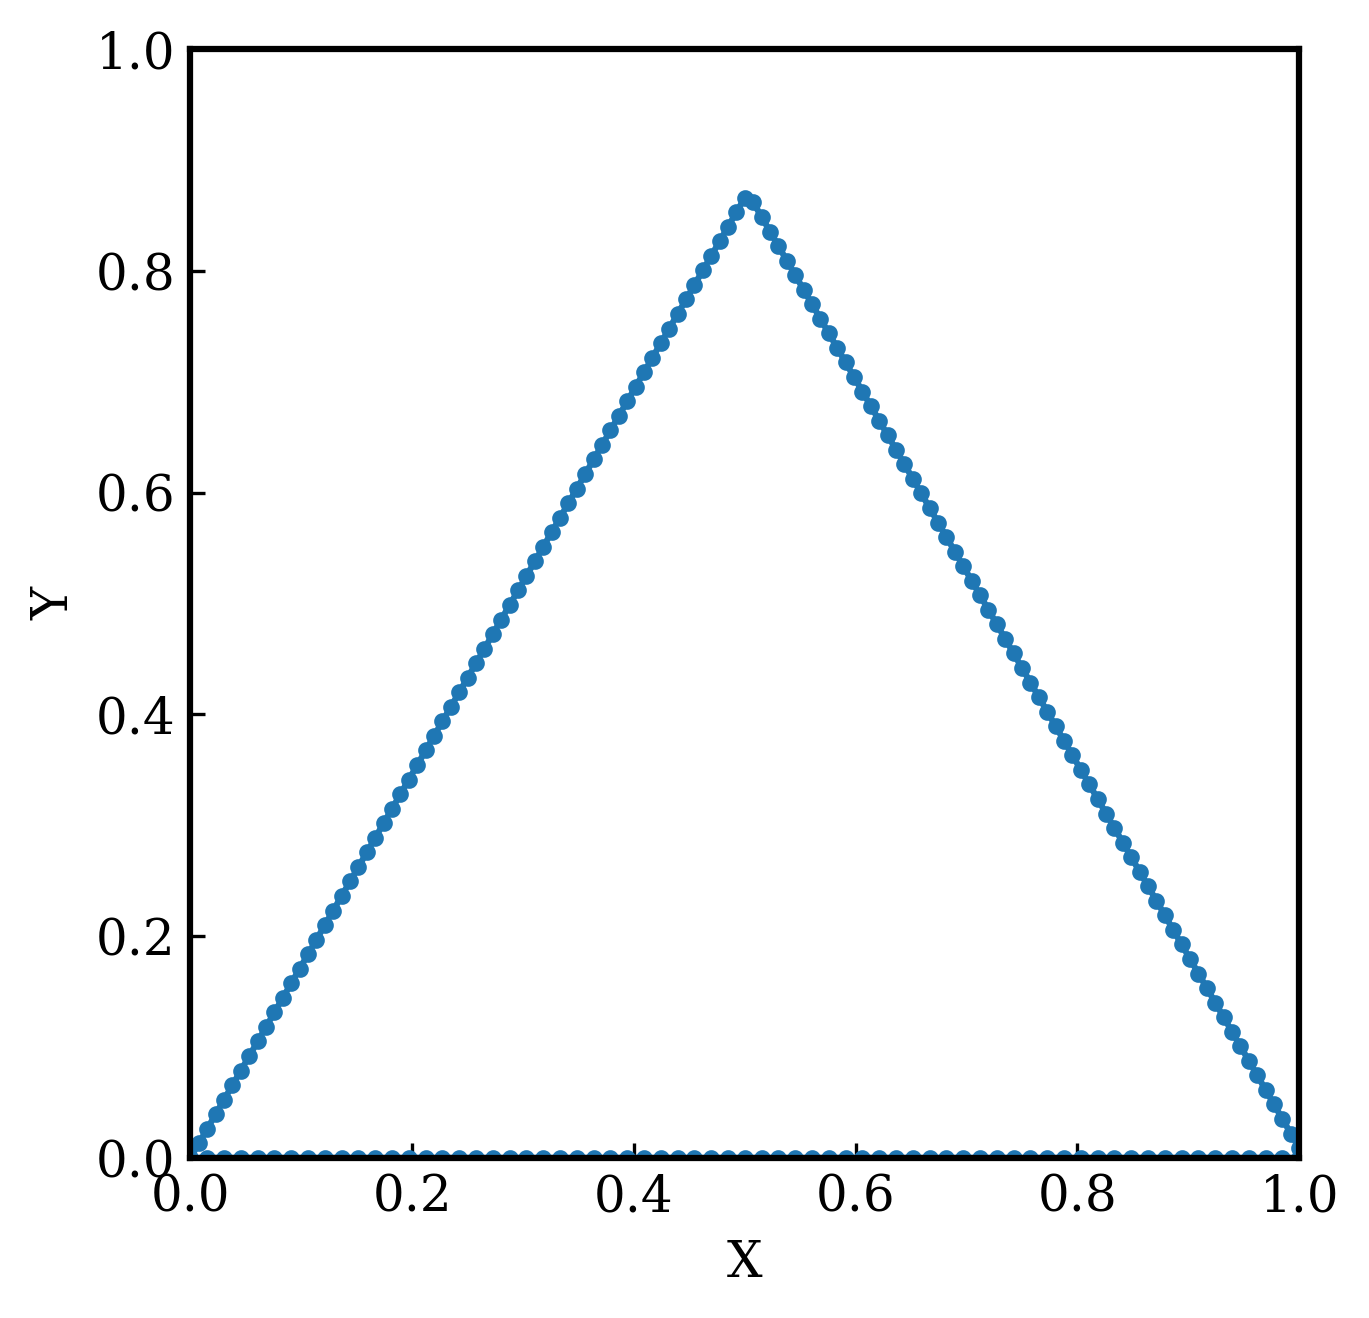

In [37]:
random_shape_id = np.random.choice(range(0,len(dataset.shapes))) # Select random test index.
dataset.shapes[random_shape_id].plot() # Visualise shape. 

### Build VAE Model:
* User specifies ```input_size```. e.g., 200 nodes x,y = 200*2
* User specifies dimension of latent space with ```latent_dim``` variable.

In [ ]:
latent_dimensions = 3
model = vae.VAE(input_size=200*2,latent_dim=latent_dimensions) # Create model object
model.to(device) # Assign model to GPU if available.


VAE(
  (encoder): Sequential(
    (0): Linear(in_features=400, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
  )
  (fc_mu): Linear(in_features=128, out_features=2, bias=True)
  (fc_logvar): Linear(in_features=128, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=400, bias=True)
  )
)

### Train VAE Model:
* Train the VAE model defined as ```model``` above.
* User specifies epochs, batch size and frequency of training checkpoints.
* Change the ```model_name``` variable to denote a new model.

In [9]:
trainer = vae.Trainer(dataset, model, base_dir=base_dir,
                      trained_data=os.path.join(base_dir,'demo_shapes.pkl'), model_name='example_model', batch_size=512)

# Train model
trainer.train_model(epochs=50,checkpoint_interval=200)

Epoch 1, Loss: 127.71879577636719
Epoch 2, Loss: 115.11992645263672
Epoch 3, Loss: 150.4302215576172
Epoch 4, Loss: 125.54240417480469
Epoch 5, Loss: 118.16165161132812
Epoch 6, Loss: 88.63081359863281
Epoch 7, Loss: 88.73584747314453
Epoch 8, Loss: 93.99662017822266
Epoch 9, Loss: 51.437137603759766
Epoch 10, Loss: 34.556068420410156
Epoch 11, Loss: 32.40016174316406
Epoch 12, Loss: 39.73217010498047
Epoch 13, Loss: 35.53148651123047
Epoch 14, Loss: 17.620264053344727
Epoch 15, Loss: 102.52208709716797
Epoch 16, Loss: 53.87310791015625
Epoch 17, Loss: 74.19019317626953
Epoch 18, Loss: 24.781841278076172
Epoch 19, Loss: 10.709297180175781
Epoch 20, Loss: 53.39299774169922
Epoch 21, Loss: 38.30174255371094
Epoch 22, Loss: 44.18505859375
Epoch 23, Loss: 32.49047088623047
Epoch 24, Loss: 10.700764656066895
Epoch 25, Loss: 63.392459869384766
Epoch 26, Loss: 30.066129684448242
Epoch 27, Loss: 48.21443557739258
Epoch 28, Loss: 54.89834213256836
Epoch 29, Loss: 74.781005859375
Epoch 30, Loss:

### Specify Model Details

In [ ]:
models = [model.to('cpu')] # List of trained models to sample and generate designs.
latent_dims = [latent_dimensions] # List of dimensions associated with each latent model.

### Sample Trained VAE Model:

In [17]:
utils.plot_all_latent_combinations(models,latent_dims,vae_metrics=vae.Metrics,shapes_path=os.path.join(base_dir,'demo_shapes.pkl'))


 Plotting for latent dimension: 2D
  ➤ Generating KDE plot...
  ➤ Saving: varying_z1_z2_fixed_.png
